# Plotting results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.concat([df['losses'] for _, df in pd.read_csv('data/full.csv', index_col=0, header=0).groupby('epoch')], axis=1)

<Figure size 640x480 with 0 Axes>

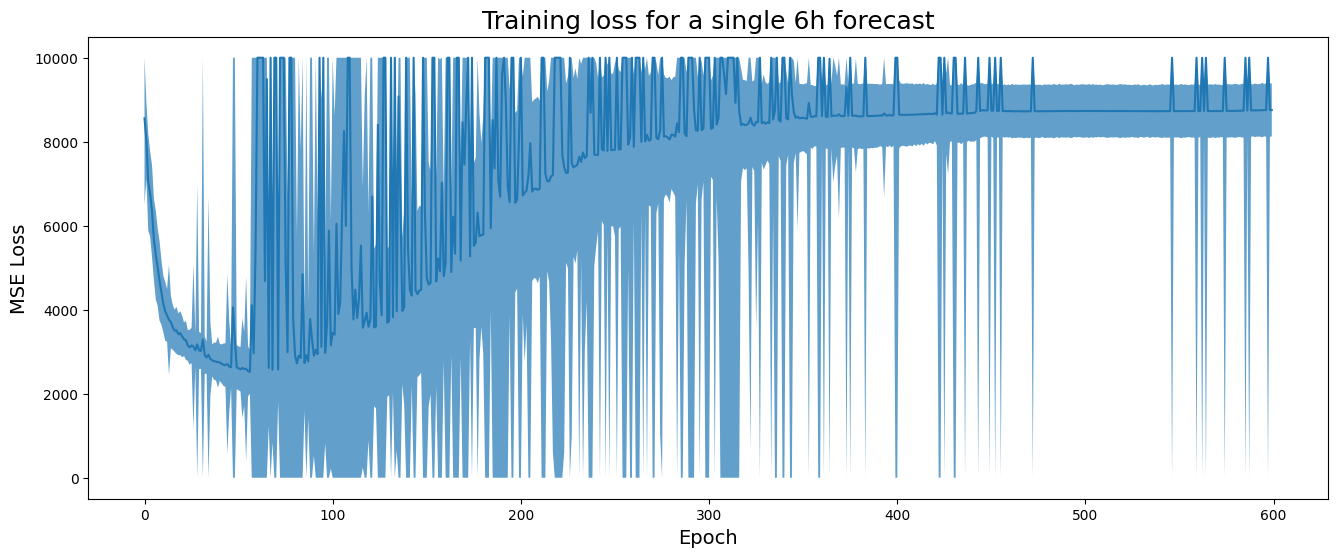

In [3]:
plt.tight_layout()
plt.figure(figsize=(16, 6))
df.mean(0).clip(None, 1e4).plot()
plt.fill_between(range(600), (df.mean(0) + df.std(0)).clip(None, 1e4), (df.mean(0) - df.std(0)).clip(0, 1e4), alpha=0.7)
plt.xticks(*[range(0, 601, 100)]*2)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE Loss", fontsize=14)
plt.title("Training loss for a single 6h forecast", fontsize=18)
plt.savefig("images/loss_full.png", bbox_inches='tight')
plt.show()

In [4]:
df = pd.concat([df['losses'] for _, df in pd.read_csv('data/half.csv', index_col=0, header=0).groupby('epoch')], axis=1)

<Figure size 640x480 with 0 Axes>

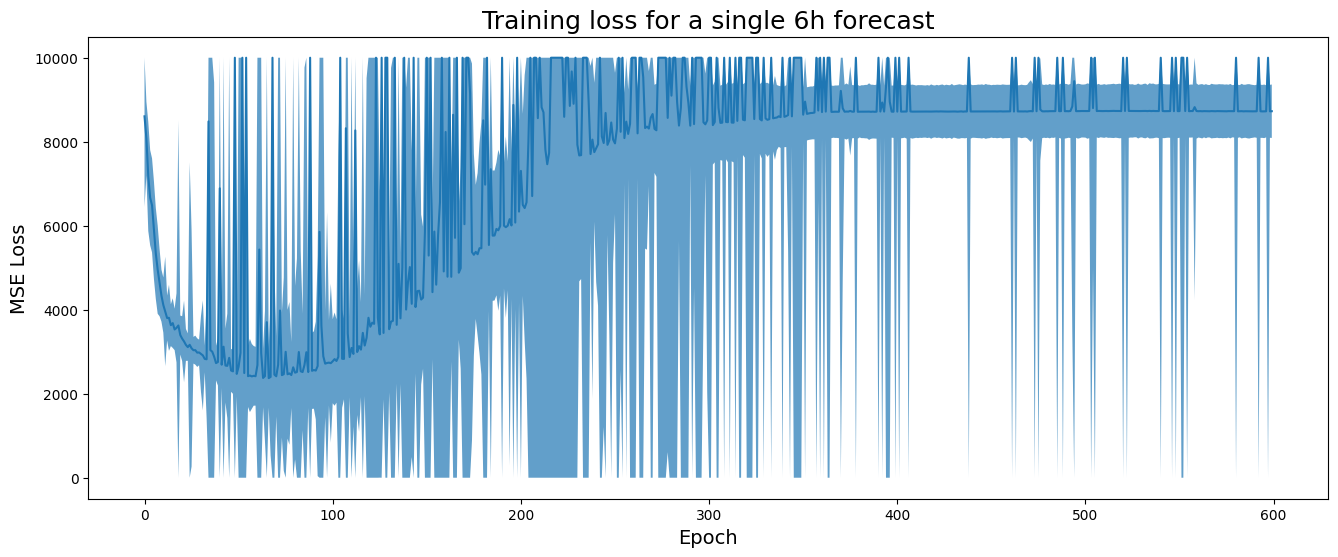

In [5]:
plt.tight_layout()
plt.figure(figsize=(16, 6))
df.mean(0).clip(None, 1e4).plot()
plt.fill_between(range(600), (df.mean(0) + df.std(0)).clip(None, 1e4), (df.mean(0) - df.std(0)).clip(0, 1e4), alpha=0.7)
plt.xticks(*[range(0, 601, 100)]*2)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE Loss", fontsize=14)
plt.title("Training loss for a single 6h forecast", fontsize=18)
plt.savefig("images/loss_half.png", bbox_inches='tight')
plt.show()

In [6]:
import torch
import numpy as np

In [7]:
for i in range(20):
    net = torch.load(f'data/models/full{i}.pt')
    torch.save(list(net[0].parameters())[0][:,512:].detach().cpu(), f'data/weights/w{i}.pt')

In [8]:
weights = np.stack([torch.load(f'data/weights/w{i}.pt') for i in range(20)])
weights.mean()

-0.39482152

In [9]:
unchanging = weights.std(axis=0) < 0.1
total = np.prod(unchanging.shape)

In [10]:
unchanging.sum() / total

0.006035804748535156

In [11]:
high = np.argsort(np.abs(weights.mean(0).flatten()))[-unchanging.sum():]
unch = np.arange(total)[unchanging.flatten()]
len(set(high).intersection(unch)) / unchanging.sum()

0.8974561542107758

In [12]:
from scipy.stats import pearsonr

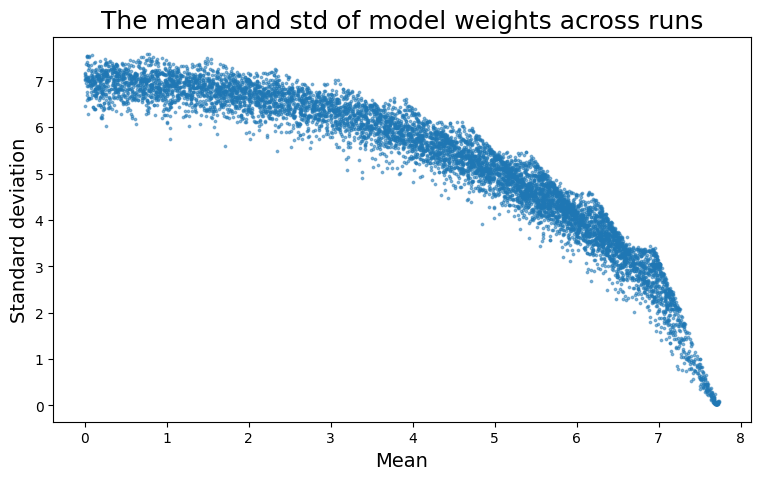

In [13]:
means = np.abs(weights.mean(0)).flatten()
stds = weights.std(0).flatten()
i = np.random.choice(np.arange(total), size=8000, replace=False)

plt.figure(figsize=(9, 5))
plt.scatter(means[i], stds[i], alpha=0.5, s=3)
plt.xlabel("Mean", fontsize=14)
plt.ylabel("Standard deviation", fontsize=14)
plt.title("The mean and std of model weights across runs", fontsize=18)
plt.savefig("images/corr.png", bbox_inches='tight')
plt.show()

In [14]:
pearsonr(means, stds)

PearsonRResult(statistic=-0.911213, pvalue=0.0)